In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

# New Section

In [2]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [5]:
df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică.
După instalare trebuie să facem restart la runtime.

In [6]:
!pip uninstall pandas-profiling

In [7]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=d5ed21d1093023285219b4c05d8dd075bb85796bc0367e648562ef4dd694a991
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [8]:
from ydata_profiling import ProfileReport

In [9]:
prof=ProfileReport(df)

In [10]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
prof

In [12]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [13]:
prof.to_file(output_file='/content/output-min.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
prof

In [15]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("target", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['target']

In [16]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [17]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [18]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(508, 952)

In [19]:
sum(y_test), len(y_test)

(121, 238)

In [20]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
X_train

age  sex  chest pain type  resting bp s  cholesterol  \
552    62    1                3           120          220   
84     56    1                4           150          213   
455    58    1                4           136          203   
513    35    1                3           123          161   
1185   45    1                1           110          264   
...   ...  ...              ...           ...          ...   
921    44    1                3           130          233   
988    34    1                1           118          182   
278    52    1                4           170          223   
229    41    1                2           120          295   
1036   60    0                3           102          318   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
552                     0            2              86                0   
84                      1            0             125                1   
455                     1            0             123                1   
513                     0            1             153                0   
1185                    0            0             132                0   
...                   ...          ...             ...              ...   
921                     0            0             179                1   
988                     0            2             174                0   
278                     0            0             126                1   
229                     0            0             170                0   
1036                    0            0             160                0   

      oldpeak  ST slope  
552       0.0         1  
84        1.0         2  
455       1.2         2  
513      -0.1         1  
1185      1.2         2  
...       ...       ...  
921       0.4         1  
988       0.0         1  
278       1.5         2  
229       0.0         1  
1036      0.0         1  

[952 rows x 11 columns]

In [22]:
y_train

552     0
84      1
455     1
513     0
1185    1
       ..
921     0
988     0
278     1
229     0
1036    0
Name: target, Length: 952, dtype: int64

In [23]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
scaler = StandardScaler()

sc = MinMaxScaler((-1, 1))

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[-0.08373429,  0.54984141, -0.25089414, ..., -0.79733232,
        -0.88257142,  0.58207998],
       [ 0.87284627,  0.54984141, -1.31719425, ..., -0.79733232,
         0.41892359,  0.58207998],
       [ 0.34141262,  0.54984141, -0.25089414, ..., -0.79733232,
        -0.5107157 ,  0.58207998],
       ...,
       [ 1.51056665,  0.54984141,  0.81540597, ...,  1.25418219,
         1.90634645,  0.58207998],
       [ 0.87284627, -1.81870622,  0.81540597, ..., -0.79733232,
         4.88119218,  2.21671165],
       [-0.8277414 ,  0.54984141,  0.81540597, ...,  1.25418219,
         0.04706787,  0.58207998]])

In [27]:
print(scaler.mean_)

[ 53.78781513   0.76785714   3.23529412 132.43382353 210.2447479
   0.21743697   0.70588235 140.4947479    0.38865546   0.94936975
   1.64390756]


In [28]:
len(X_train)

952

In [29]:
from torch.utils.data import Dataset, DataLoader

In [30]:
import torch
from torch import nn, optim

In [31]:
#Dataset - o clasă din PyTorch foarte utilă gestionării seturilor de date
class Dataset(Dataset):
    """ Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [32]:
trainDataset=Dataset(X_train, y_train)

In [33]:
trainDataset[0]

(tensor([ 0.8728,  0.5498, -0.2509, -0.6662,  0.0948, -0.5271,  1.4843, -2.1755,
         -0.7973, -0.8826, -1.0526]),
 tensor(0))

In [34]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [35]:
validationDataset=Dataset(X_test, y_test)

In [36]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [37]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output.
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(11,10),
            nn.ReLU(),
            nn.Linear(10, 6),
            nn.ReLU(),
            nn.Linear(6, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [38]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(11, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 2)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        return self.fc3(x)

In [39]:
net = HeartDiseaseNN()

In [40]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [41]:
print(f"Model has {count_parameters(net):,} number of trainable parameters.")

Model has 200 number of trainable parameters.


In [42]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [43]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [44]:
# Colectăm accuratetea pentru a o plota ulterior
train_accuracies = []
validation_accuracies = []

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    correct = 0
    losses=[]

    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels = data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


      #Obținem predictiile pentru fiecare linie din setul de validare.
      #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
      pred = outputs.data.max(1, keepdim=True)[1]

      #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
      correct += pred.eq(labels.data.view_as(pred)).sum()
      current_correct=pred.eq(labels.data.view_as(pred)).sum()


      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs):.2f}%")
    mean_loss=sum(losses)/len(losses)
    accuracy = 100. * correct/len(trainLoader.dataset)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    train_accuracies.append(accuracy)

    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}, Accuracy: {accuracy:.2f}%")

In [47]:
# Colectăm loss-ul din validare pentru a o plota ulterior
validation_losses=[]

In [48]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    valid_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          valid_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs):.2f}%")
          print("============")
        mean_loss=sum(valid_loss)/len(valid_loss)
        validation_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy:.2f}%")

        validation_accuracies.append(accuracy)


In [49]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(20):
  train(epoch)
  validation()

[Train Epoch: 0, Batch: 1, Loss: 0.7602875828742981, Accuracy: 46.88%
[Train Epoch: 0, Batch: 2, Loss: 0.760779082775116, Accuracy: 43.75%
[Train Epoch: 0, Batch: 3, Loss: 0.8088250160217285, Accuracy: 31.25%
[Train Epoch: 0, Batch: 4, Loss: 0.7294583320617676, Accuracy: 43.75%
[Train Epoch: 0, Batch: 5, Loss: 0.634160041809082, Accuracy: 65.62%
[Train Epoch: 0, Batch: 6, Loss: 0.6912040710449219, Accuracy: 46.88%
[Train Epoch: 0, Batch: 7, Loss: 0.6968120336532593, Accuracy: 43.75%
[Train Epoch: 0, Batch: 8, Loss: 0.6957864165306091, Accuracy: 40.62%
[Train Epoch: 0, Batch: 9, Loss: 0.6634933948516846, Accuracy: 50.00%
[Train Epoch: 0, Batch: 10, Loss: 0.5997189283370972, Accuracy: 62.50%
[Train Epoch: 0, Batch: 11, Loss: 0.6528900861740112, Accuracy: 59.38%
[Train Epoch: 0, Batch: 12, Loss: 0.594921886920929, Accuracy: 71.88%
[Train Epoch: 0, Batch: 13, Loss: 0.5889970660209656, Accuracy: 81.25%
[Train Epoch: 0, Batch: 14, Loss: 0.573303759098053, Accuracy: 81.25%
[Train Epoch: 0, Ba

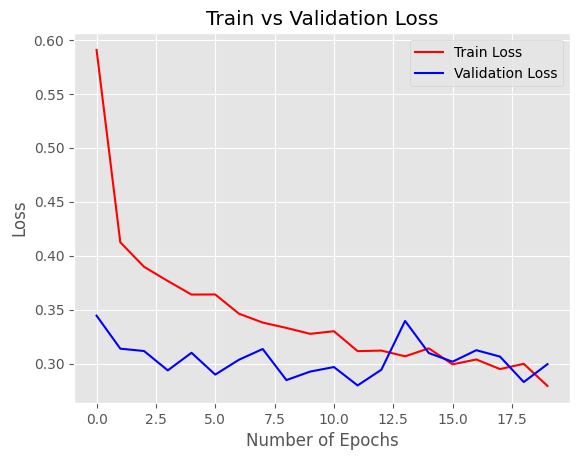

In [50]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.title("Train vs Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(train_losses, "r-", label='Train Loss')
plt.plot(validation_losses, "b-", label ='Validation Loss')
plt.legend(loc="upper right")

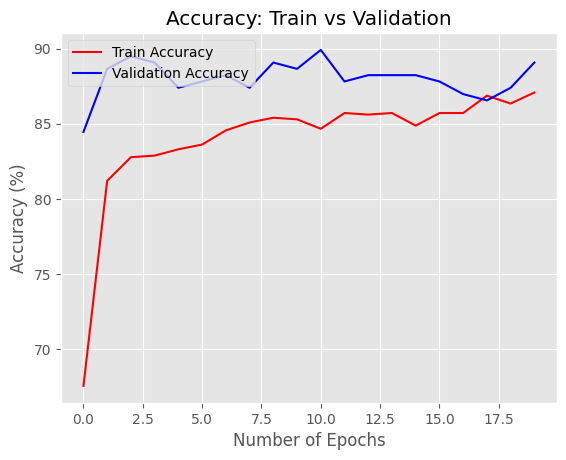

In [51]:
plt.title("Accuracy: Train vs Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy (%)")
plt.plot(train_accuracies, "r-", label='Train Accuracy')
plt.plot(validation_accuracies, 'b-', label='Validation Accuracy')
plt.legend(loc="upper left")

In [55]:

#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [56]:
index_of_test=30

In [57]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")


Neural network response is: 0
Actual response is: 0
